**Author : Sakshi**
 

**Task 1 : Predict the percentage of an student based on the no. of study hours**.


**Importing important libraries** 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Importing and reading the Dataset**




In [ ]:
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
print(Data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


**Exploring the Dataset**

In [ ]:
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data.head(10) returns the first 10 data of the dataset**

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Data.info() gives the infromation about the dataset**

In [ ]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data.describe() returns the statistical data** 

***Checking null values in a Dataset***

In [ ]:
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Data.isnull().sum() returns the sum of misisng value**  

**Visualization of the data before using any ML Model**

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


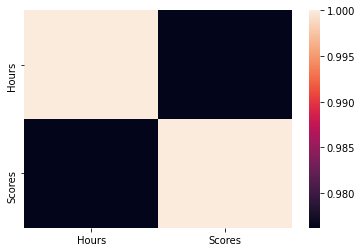

In [ ]:
cor = Data.corr()
print(cor)
sns.heatmap(cor)

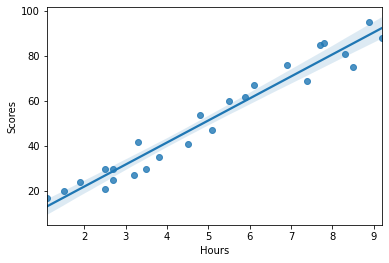

In [ ]:
sns.regplot(x="Hours", y="Scores", data=Data)

**Splitting Training and Testing Dataset**

In [ ]:
X = Data.iloc[:, :-1].values  
Y = Data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.80)
print(f"Train labels:\n{y_train}")
print(f"Test labels:\n{y_test}")

Train labels:
[25 47 81 21 30 76 75 95 20 30 86 69 54 62 24 88 41 42 35 67]
Test labels:
[27 85 30 60 17]


**Training the model**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the new y values**

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[34.16871526 77.11699384 37.03193383 56.12005764 14.12618526]




**Displaying Original y value and predicted y value**



In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,27,34.168715
1,85,77.116994
2,30,37.031934
3,60,56.120058
4,17,14.126185


**Prdeicting own hours**

In [ ]:
hours = 9.25 
test = np.array([hours]).reshape(-1, 1)
own_pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.91028979013527


**Evaluating the model**

In [ ]:

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 5.767482470905942
Mean Squared Error: 37.25862438649561
Root Mean Squared Error: 6.103984304247154
R^2: 0.9408743424106646


**R^2 gives the score of model fit and in this case we have R^2 = 0.9408743424106646  which is fair score for this model.**


**Thankyou**